In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing pytorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as func #contains all activation functions etc

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#to pickle and save the model 
import dill as dill
import pickle
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'] = np.where(df['Outcome']==1, "Diabetic", "Non diabetic")
#we need to convert the numerical outcome feature into categorical object as seaborn only takes categorical features as hue

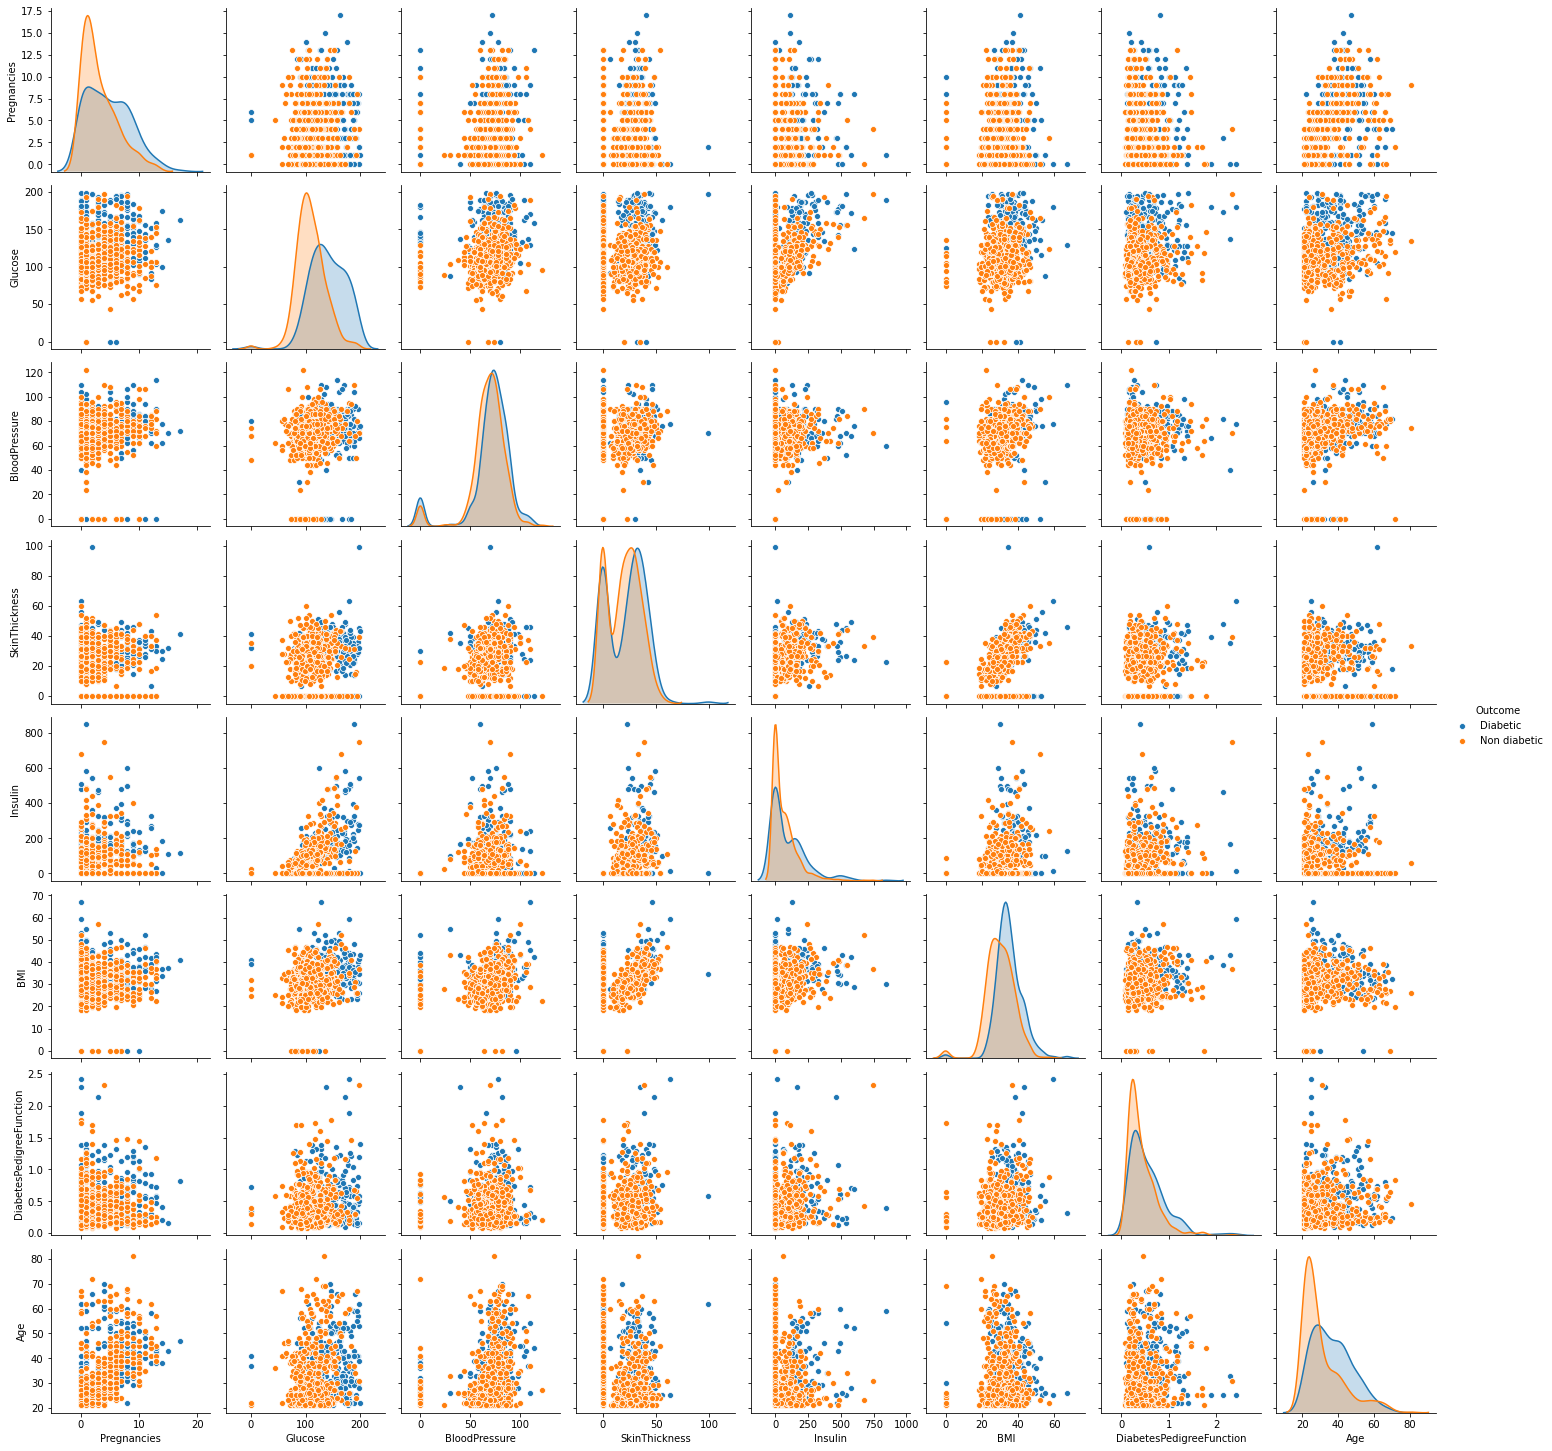

In [7]:
sns.pairplot(df, hue="Outcome")

In [8]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [9]:
X = df.drop('Outcome', axis= 1).values#independent features
y = df['Outcome'].values#dependent features
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
#creating tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
#creating model

class ANN_Model(nn.Module):
    
    def __init__(self, input_features=8, hidden1 = 20, hidden2= 20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    
    def forward(self, x):
        x = func.relu(self.f_connected1(x))
        x = func.relu(self.f_connected2(x))
        x = self.out(x)
        return x
        
        
        

In [12]:
#instantiating ANN model
torch.manual_seed(40)
model = ANN_Model()

In [13]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [14]:
loss_func= nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr = 0.01)

In [15]:
epochs = 500
final_losses= []
for i in range(epochs):
    i = i+1
    y_pred = model.forward(x_train)
    loss=loss_func(y_pred, y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch {} : Loss: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(y_pred)

Epoch 1 : Loss: 7.072890758514404
Epoch 11 : Loss: 0.955478310585022
Epoch 21 : Loss: 0.6535174250602722
Epoch 31 : Loss: 0.6358084678649902
Epoch 41 : Loss: 0.6206435561180115
Epoch 51 : Loss: 0.6022768020629883
Epoch 61 : Loss: 0.593238115310669
Epoch 71 : Loss: 0.5843856334686279
Epoch 81 : Loss: 0.5759251713752747
Epoch 91 : Loss: 0.5681201815605164
Epoch 101 : Loss: 0.5591766834259033
Epoch 111 : Loss: 0.5491806864738464
Epoch 121 : Loss: 0.5392303466796875
Epoch 131 : Loss: 0.5303356051445007
Epoch 141 : Loss: 0.5230024456977844
Epoch 151 : Loss: 0.516257107257843
Epoch 161 : Loss: 0.5102280378341675
Epoch 171 : Loss: 0.504486083984375
Epoch 181 : Loss: 0.49928009510040283
Epoch 191 : Loss: 0.49450892210006714
Epoch 201 : Loss: 0.4891594648361206
Epoch 211 : Loss: 0.48381689190864563
Epoch 221 : Loss: 0.4789169728755951
Epoch 231 : Loss: 0.47435086965560913
Epoch 241 : Loss: 0.4690694510936737
Epoch 251 : Loss: 0.46429547667503357
Epoch 261 : Loss: 0.45930400490760803
Epoch 271 :

Text(0.5, 0, '500')

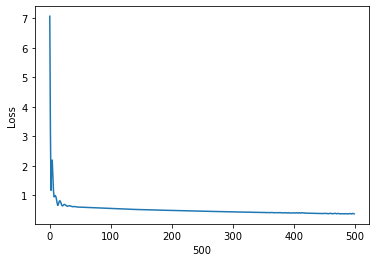

In [16]:
#plotting the loss function

plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel(epochs)

In [17]:
#testing data
predictions=[]
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item() )

1
0
0
1
0
0
1
1
0
1
1
1
0
0
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
1
1
0
0
0
1
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0


In [18]:
cm = confusion_matrix(y_test, predictions)
cm

array([[85, 22],
       [15, 32]])

### Trials
###### 1. Without normalizing
Training loss 500 epochs: 0.3706159293651581

Accuracy on test set: 0.8181818181818182

Since normalizing the data caused overfitting, data is used without normalizing

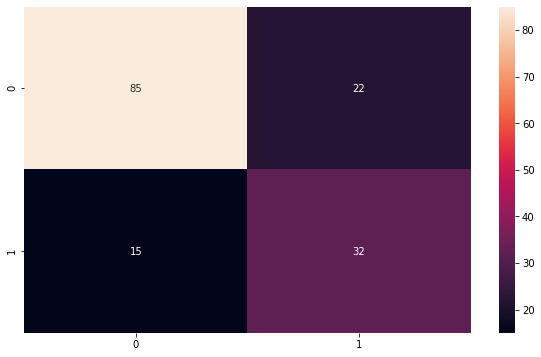

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel = ("Actual Values")
plt.ylabel = ("Predicted Values")

In [20]:
score = accuracy_score(y_test, predictions)
score


0.7597402597402597

In [21]:
# Saving the model
torch.save(model, "diabetes.pt")

/opt/conda/lib/python3.7/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [22]:
model =  torch.load("diabetes.pt")

In [23]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [24]:
### getting first entry from database to predict a new entry
list(df.iloc[0, :-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [25]:
list1 = [1.0, 148.0, 43.0, 23.0, 0.0, 33.9, 0.27, 0.0]




In [26]:
new_data = torch.tensor(list1)
with torch.no_grad(): #deactivates autograding and eventually reduces memory usage and speeds up computation
    print(model(new_data).argmax().item()) #argmax returns a tensor while .item() makes it a normal number

1


In [27]:
filename = 'diabetes-prediction-model.pkl'
pickle.dump(model, open(filename, 'wb'))

/opt/conda/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)
